In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Final_project_DataMining/diabetes_prediction_dataset.csv')



# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

# Assuming your dataset is stored in a DataFrame called df
# Create a Sweetviz report for the dataset
report = sv.analyze(data)

# Generate an HTML report
report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



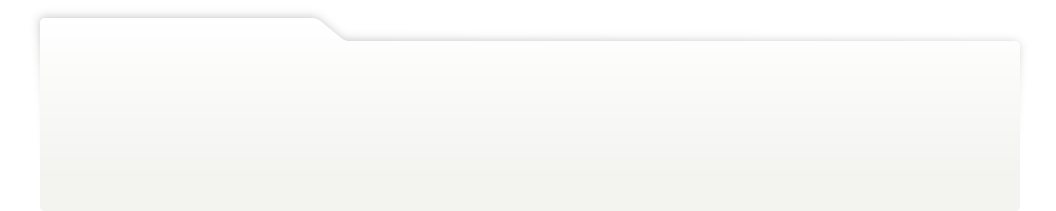
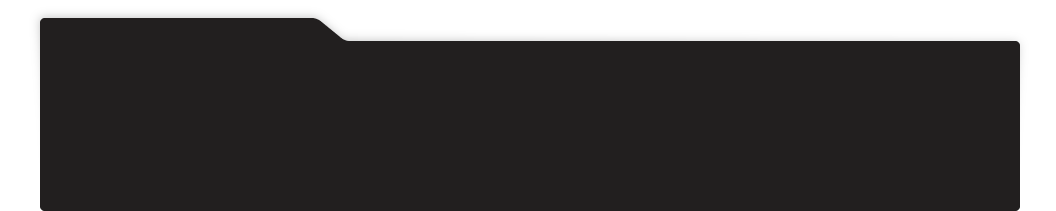
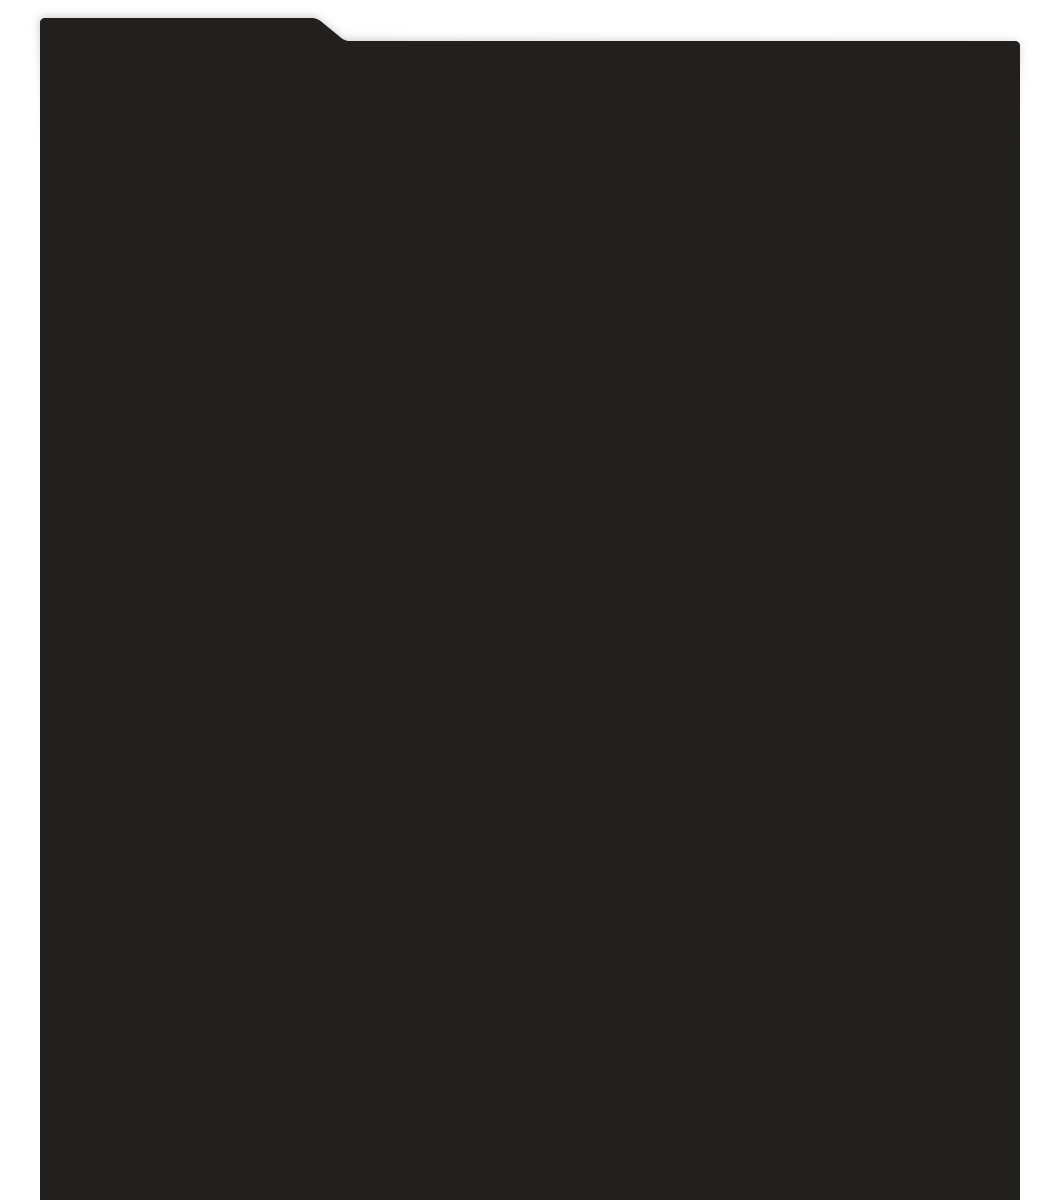
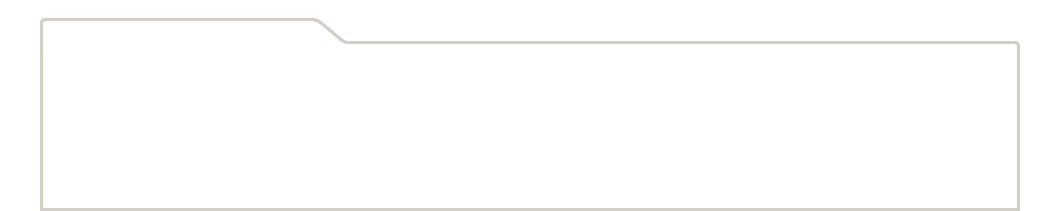
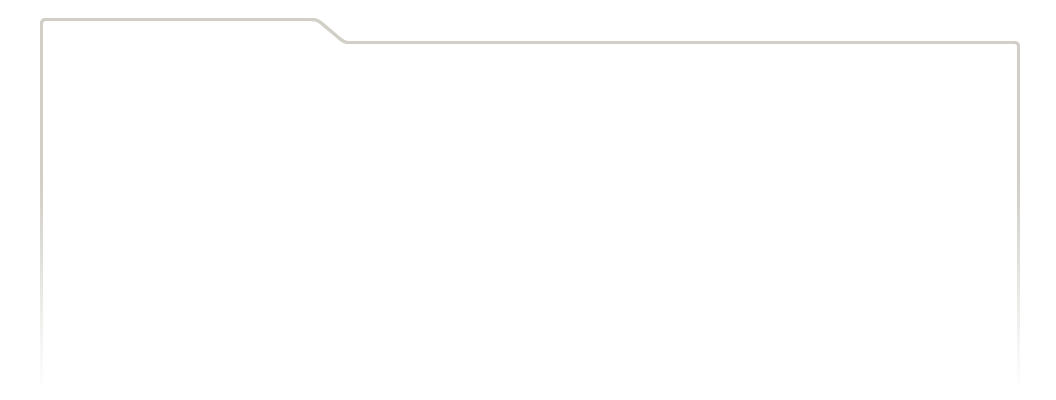
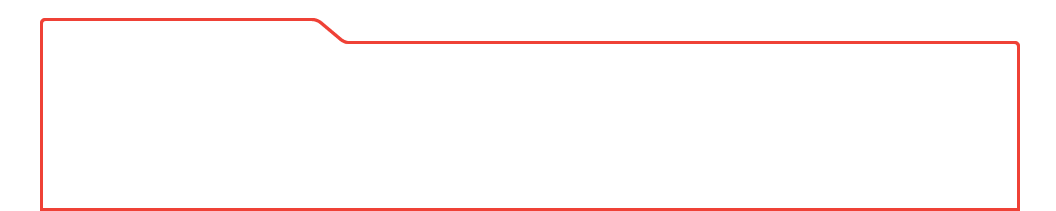
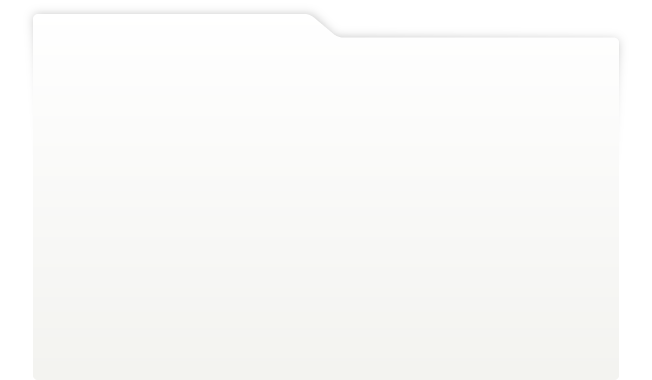
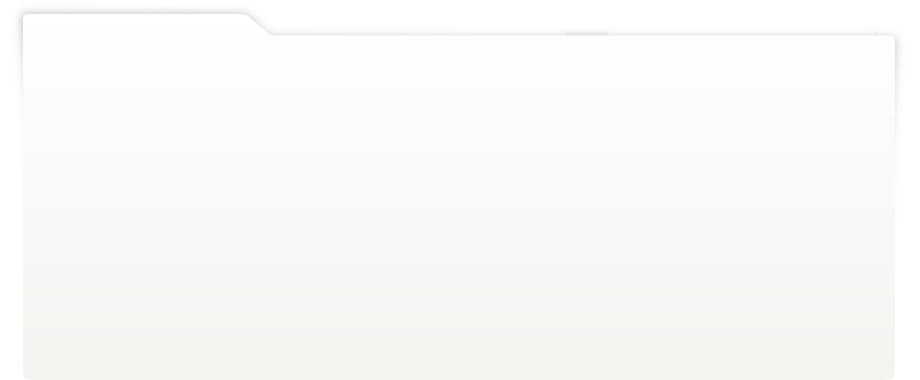
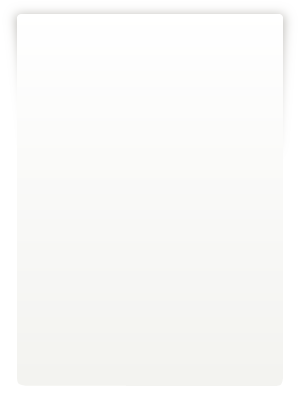
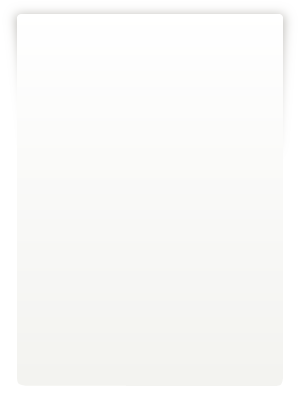
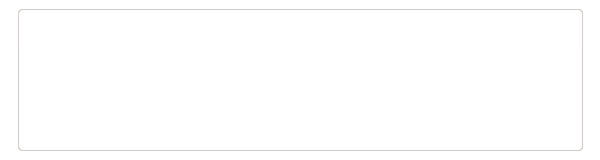
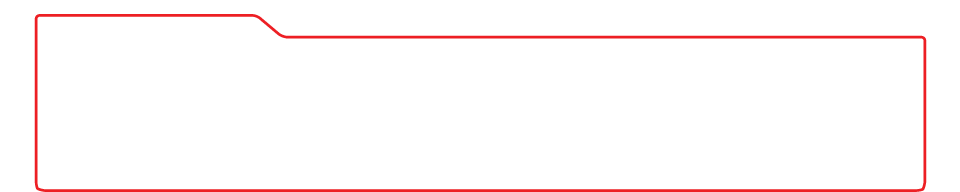
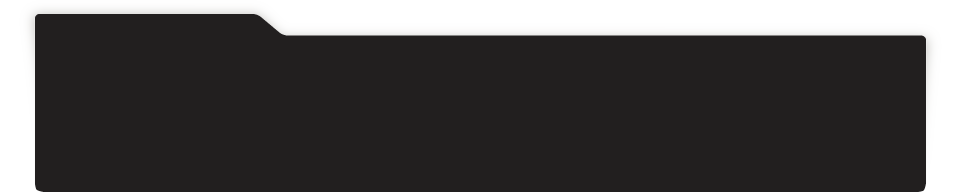
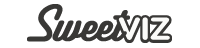
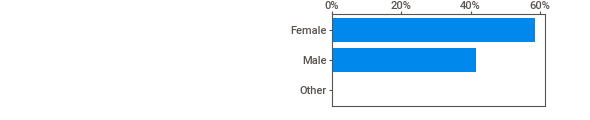
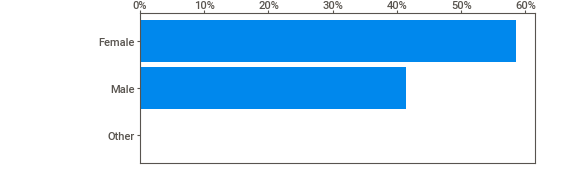
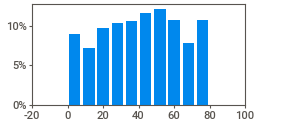
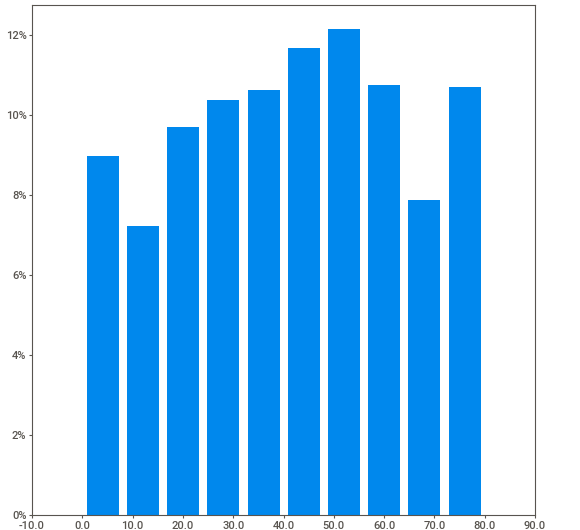
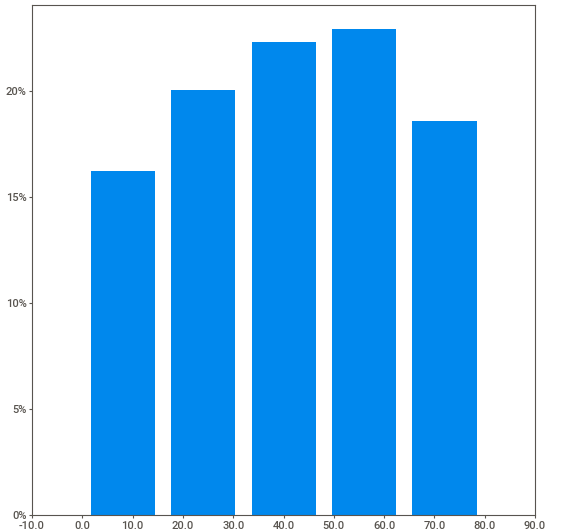
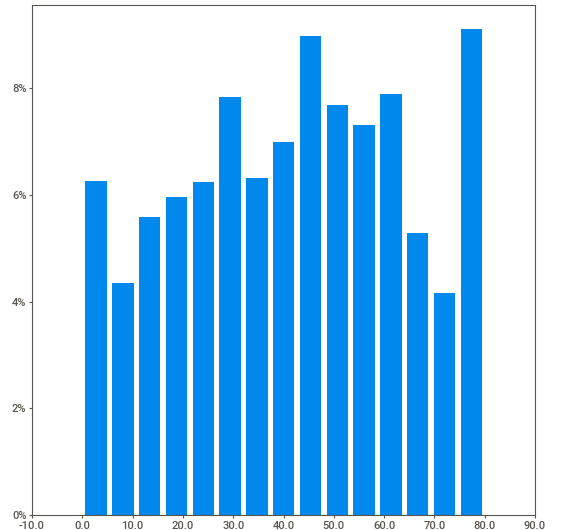
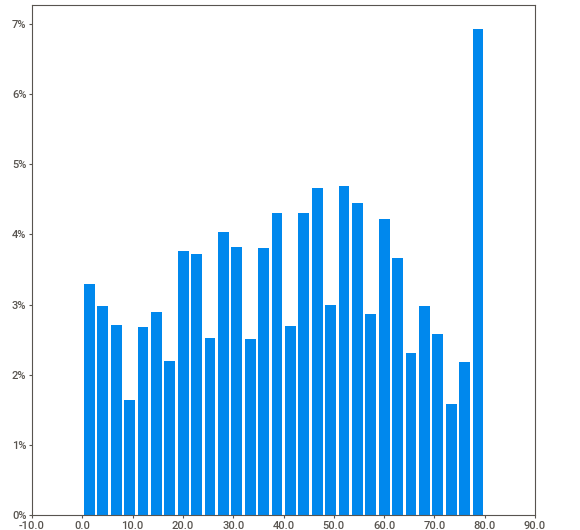
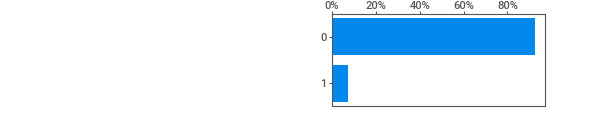
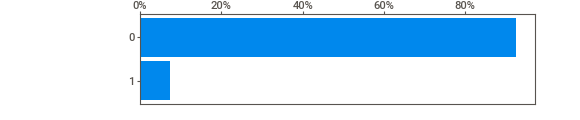
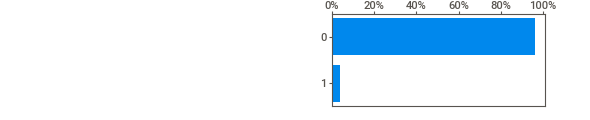
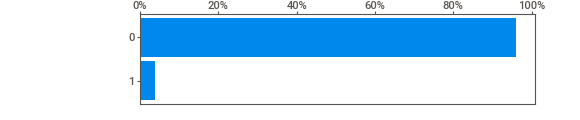
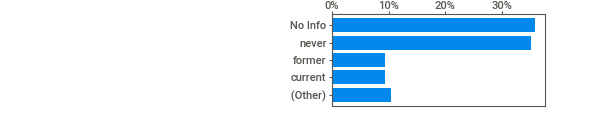
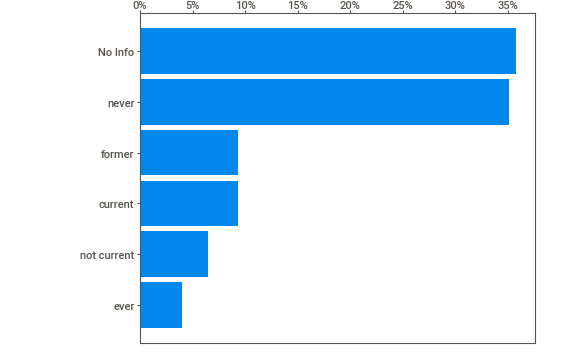
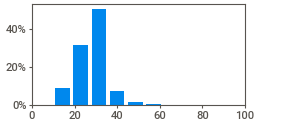
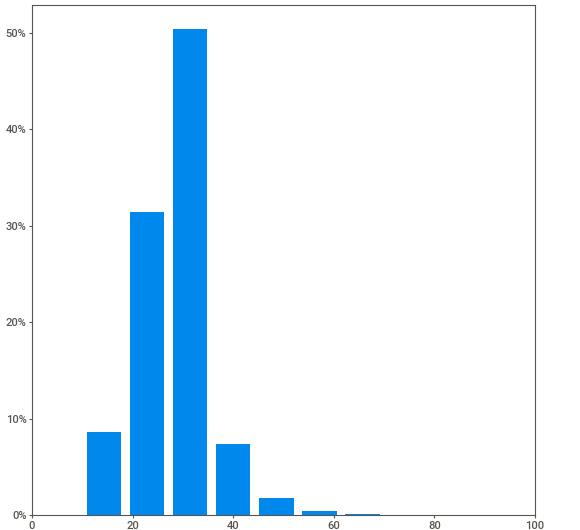
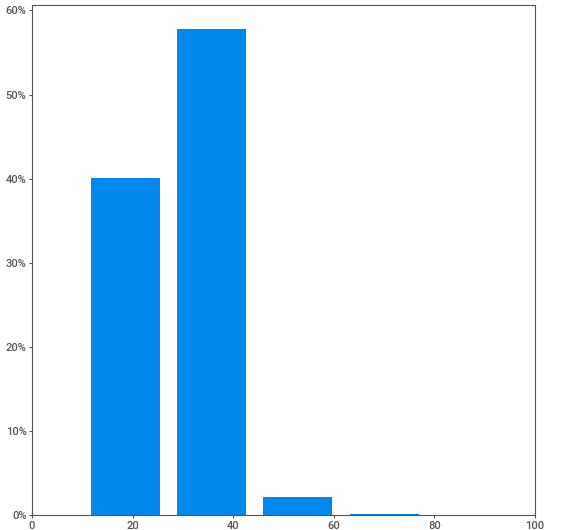
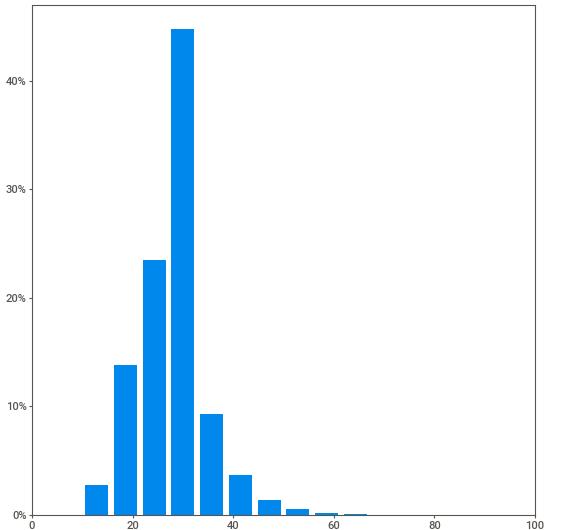
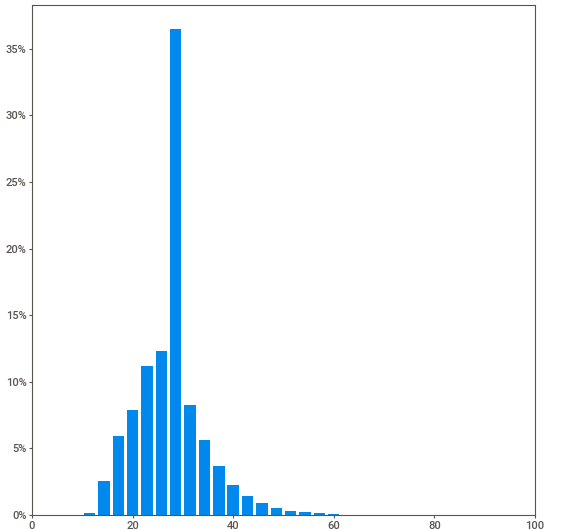
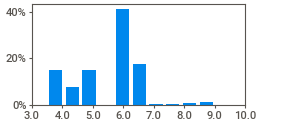
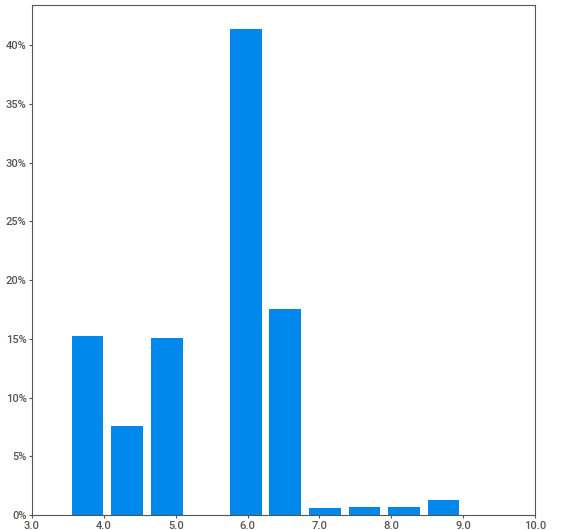
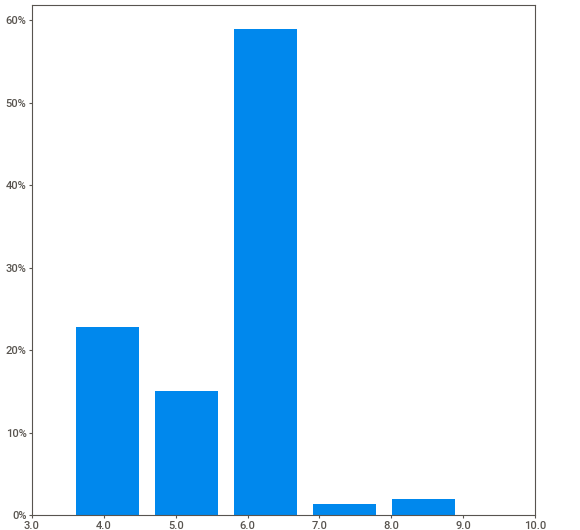
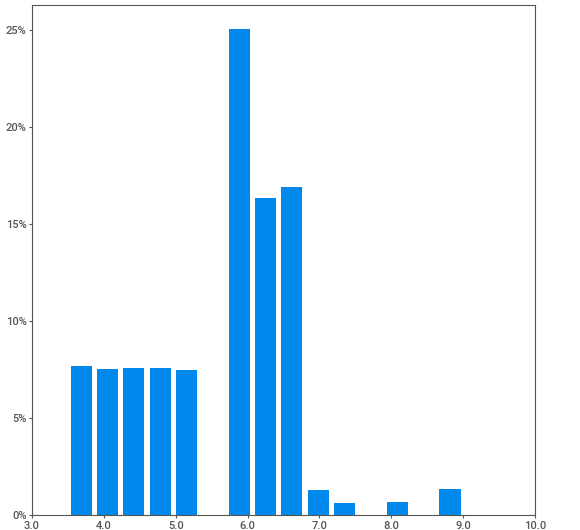
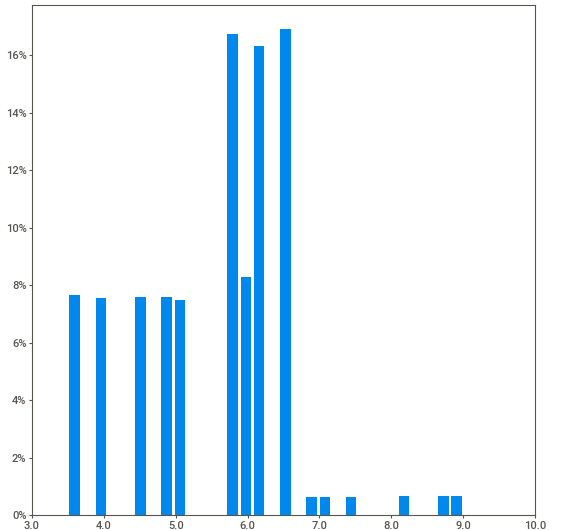
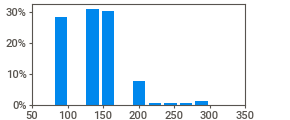
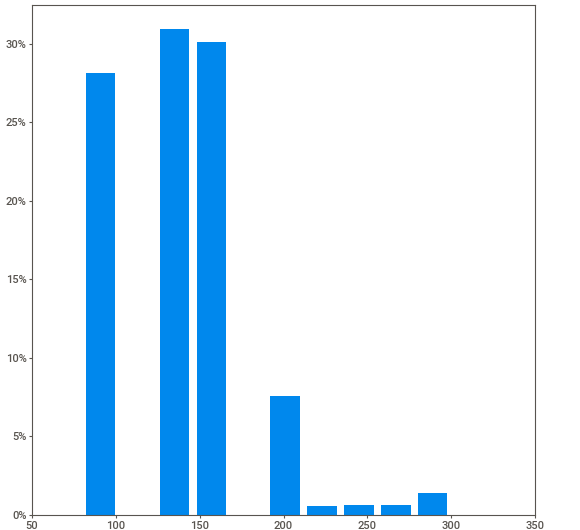
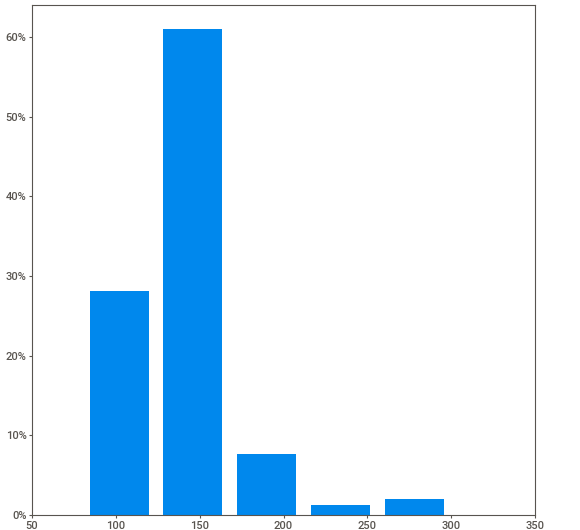
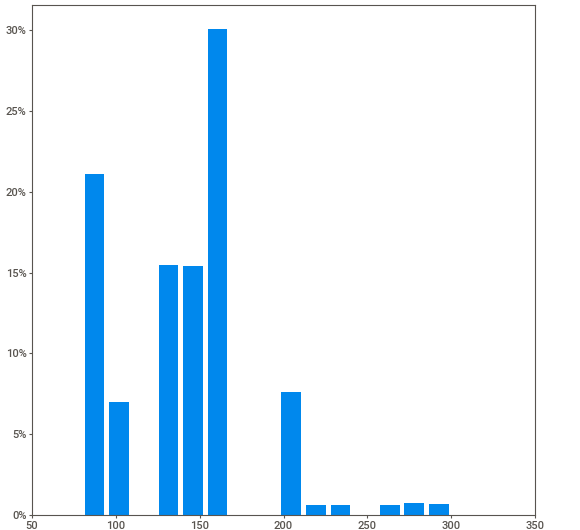
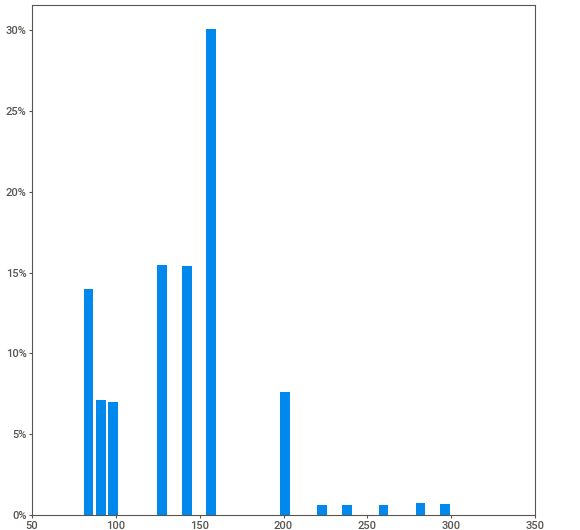
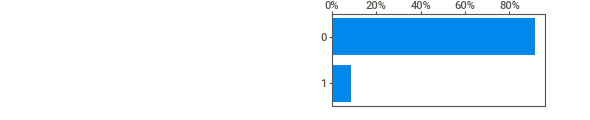
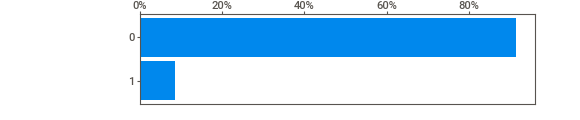
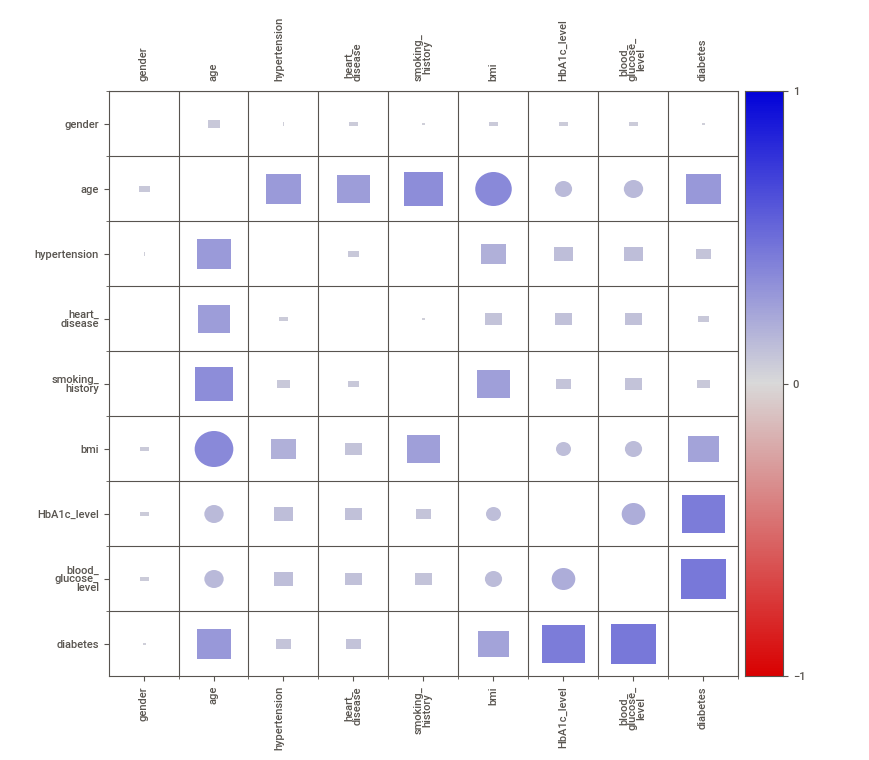
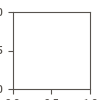

In [ ]:
from IPython.display import HTML

# Path to your HTML file
html_path = '/content/sweetviz_report.html'

# Display the HTML file
with open(html_path, 'r') as file:
    html_content = file.read()
    display(HTML(html_content))


In [ ]:
# Handling missing values
# data.fillna(data.median(), inplace=True)

# Dealing with outliers (if any)
# You can use techniques like Winsorization or remove outliers based on domain knowledge.

# Splitting the data into features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'gender' is a categorical variable
label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])

X = X.drop(columns=['smoking_history'])


In [ ]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Naive Bayes
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_scaled, y, cv=5)
print("Naive Bayes Accuracy: ", np.mean(nb_scores))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Random Forest Accuracy: ", np.mean(rf_scores))

# LSTM
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Reshape for LSTM input

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_scaled.shape[1])))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_scores = lstm_model.fit(X_lstm, y, epochs=10, batch_size=32, validation_split=0.2)
print("LSTM Accuracy: ", lstm_scores.history['val_accuracy'][-1])


Naive Bayes Accuracy:  0.90344
Random Forest Accuracy:  0.96899
Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1487 - accuracy: 0.9554 - val_loss: 0.1119 - val_accuracy: 0.9626
Epoch 2/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1084 - accuracy: 0.9636 - val_loss: 0.1044 - val_accuracy: 0.9654
Epoch 3/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1021 - accuracy: 0.9671 - val_loss: 0.0986 - val_accuracy: 0.9680
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0962 - accuracy: 0.9688 - val_loss: 0.0939 - val_accuracy: 0.9685
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0925 - accuracy: 0.9695 - val_loss: 0.0905 - val_accuracy: 0.9704
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0896 - accuracy: 0.9700 - val_loss: 0.0888 - val_accuracy: 0.9696
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - 

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

nb_model.fit(X_scaled, y)
nb_predictions = nb_model.predict(X_scaled)

print("Naive Bayes Classification Report:")
print(classification_report(y, nb_predictions))

# Naive Bayes does not have a decision_function or predict_proba method, so ROC AUC score cannot be calculated.


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     91500
           1       0.45      0.65      0.53      8500

    accuracy                           0.90    100000
   macro avg       0.71      0.79      0.74    100000
weighted avg       0.92      0.90      0.91    100000



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

rf_model.fit(X_scaled, y)
rf_predictions = rf_model.predict(X_scaled)
rf_proba = rf_model.predict_proba(X_scaled)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y, rf_predictions))

print("Random Forest ROC AUC Score:", roc_auc_score(y, rf_proba))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91500
           1       1.00      0.98      0.99      8500

    accuracy                           1.00    100000
   macro avg       1.00      0.99      0.99    100000
weighted avg       1.00      1.00      1.00    100000

Random Forest ROC AUC Score: 0.9999308113146899


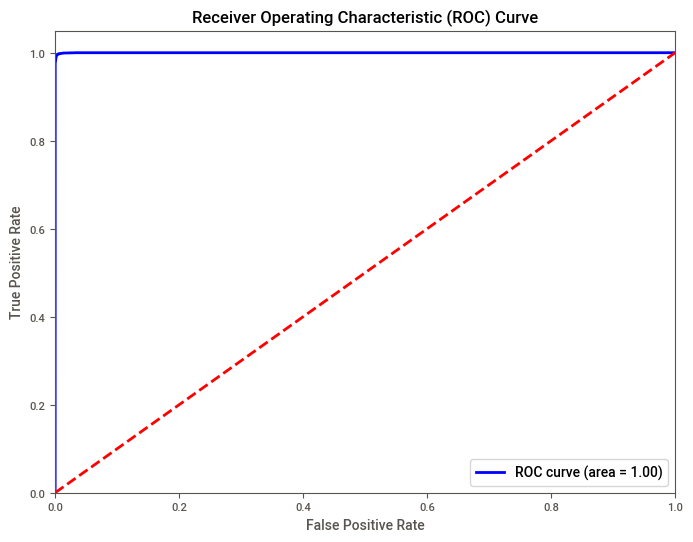

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y, rf_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y, rf_proba))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# LSTM predictions
lstm_probabilities = lstm_model.predict(X_lstm)
lstm_predictions = (lstm_probabilities > 0.5).astype('int32')

print("LSTM Classification Report:")
print(classification_report(y, lstm_predictions))

print("LSTM ROC AUC Score:", roc_auc_score(y, lstm_probabilities))


3125/3125 [==============================] - 6s 2ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     91500
           1       0.99      0.68      0.80      8500

    accuracy                           0.97    100000
   macro avg       0.98      0.84      0.89    100000
weighted avg       0.97      0.97      0.97    100000

LSTM ROC AUC Score: 0.9767187759562842


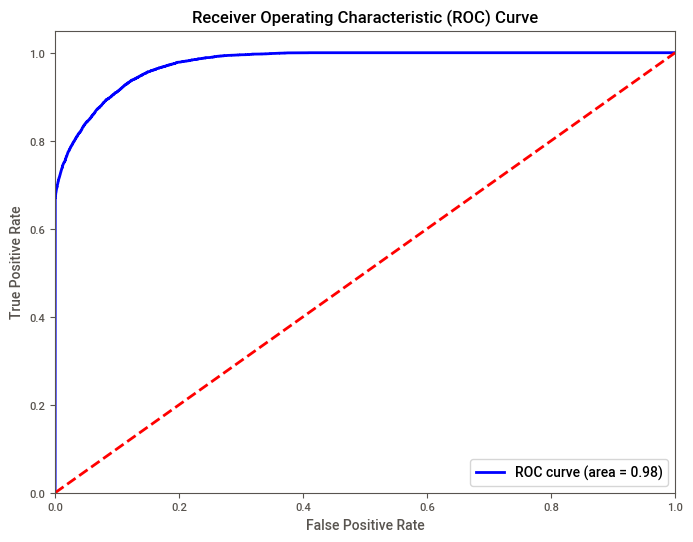

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, lstm_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y, lstm_probabilities))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


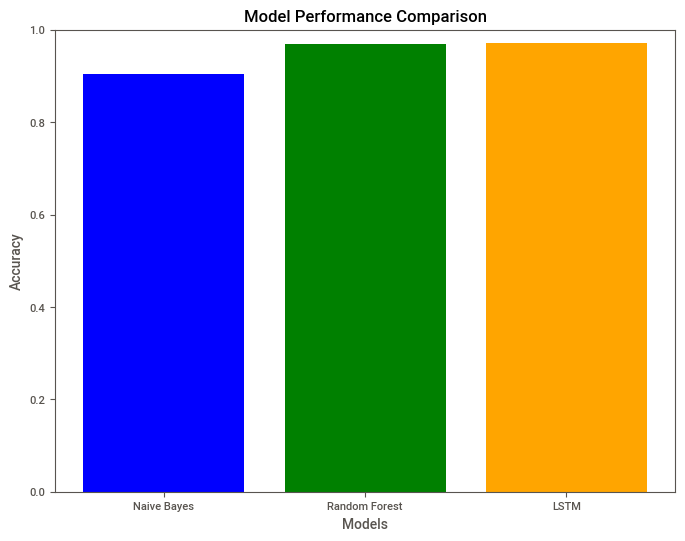

In [ ]:
import matplotlib.pyplot as plt

#Model Perfomance
models = ['Naive Bayes', 'Random Forest', 'LSTM']
accuracy_scores = [np.mean(nb_scores), np.mean(rf_scores), lstm_scores.history['val_accuracy'][-1]]

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Limit the y-axis from 0 to 1 as accuracy scores range from 0 to 1
plt.show()


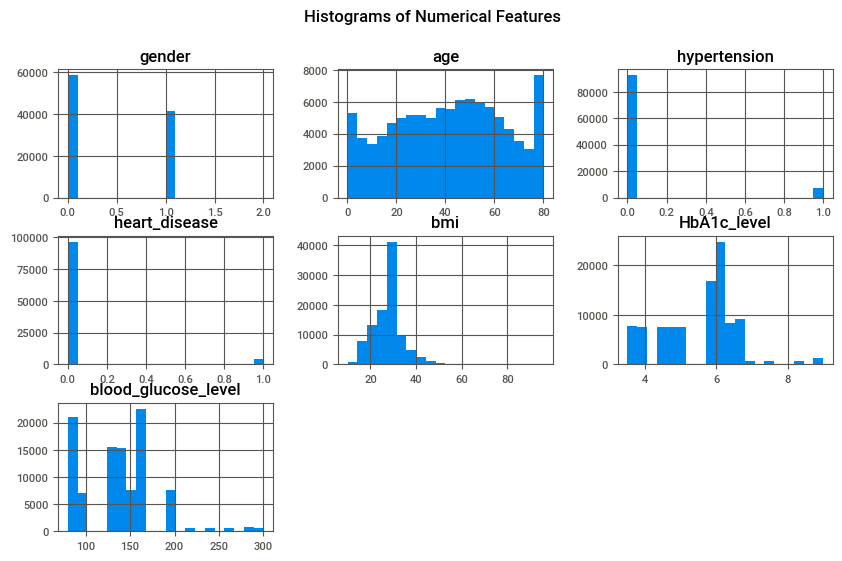

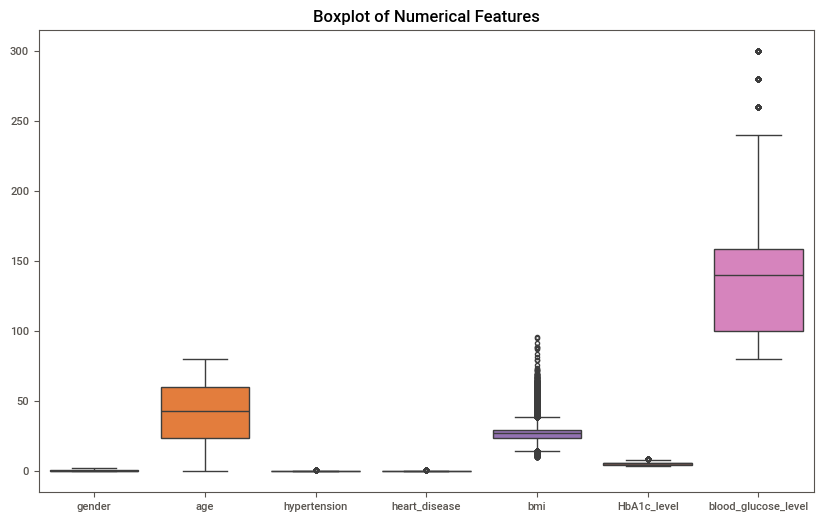

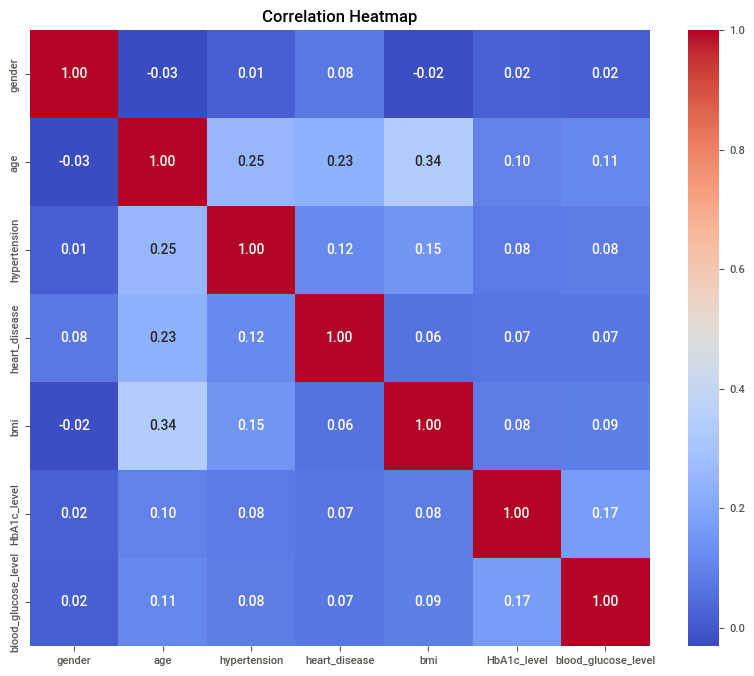

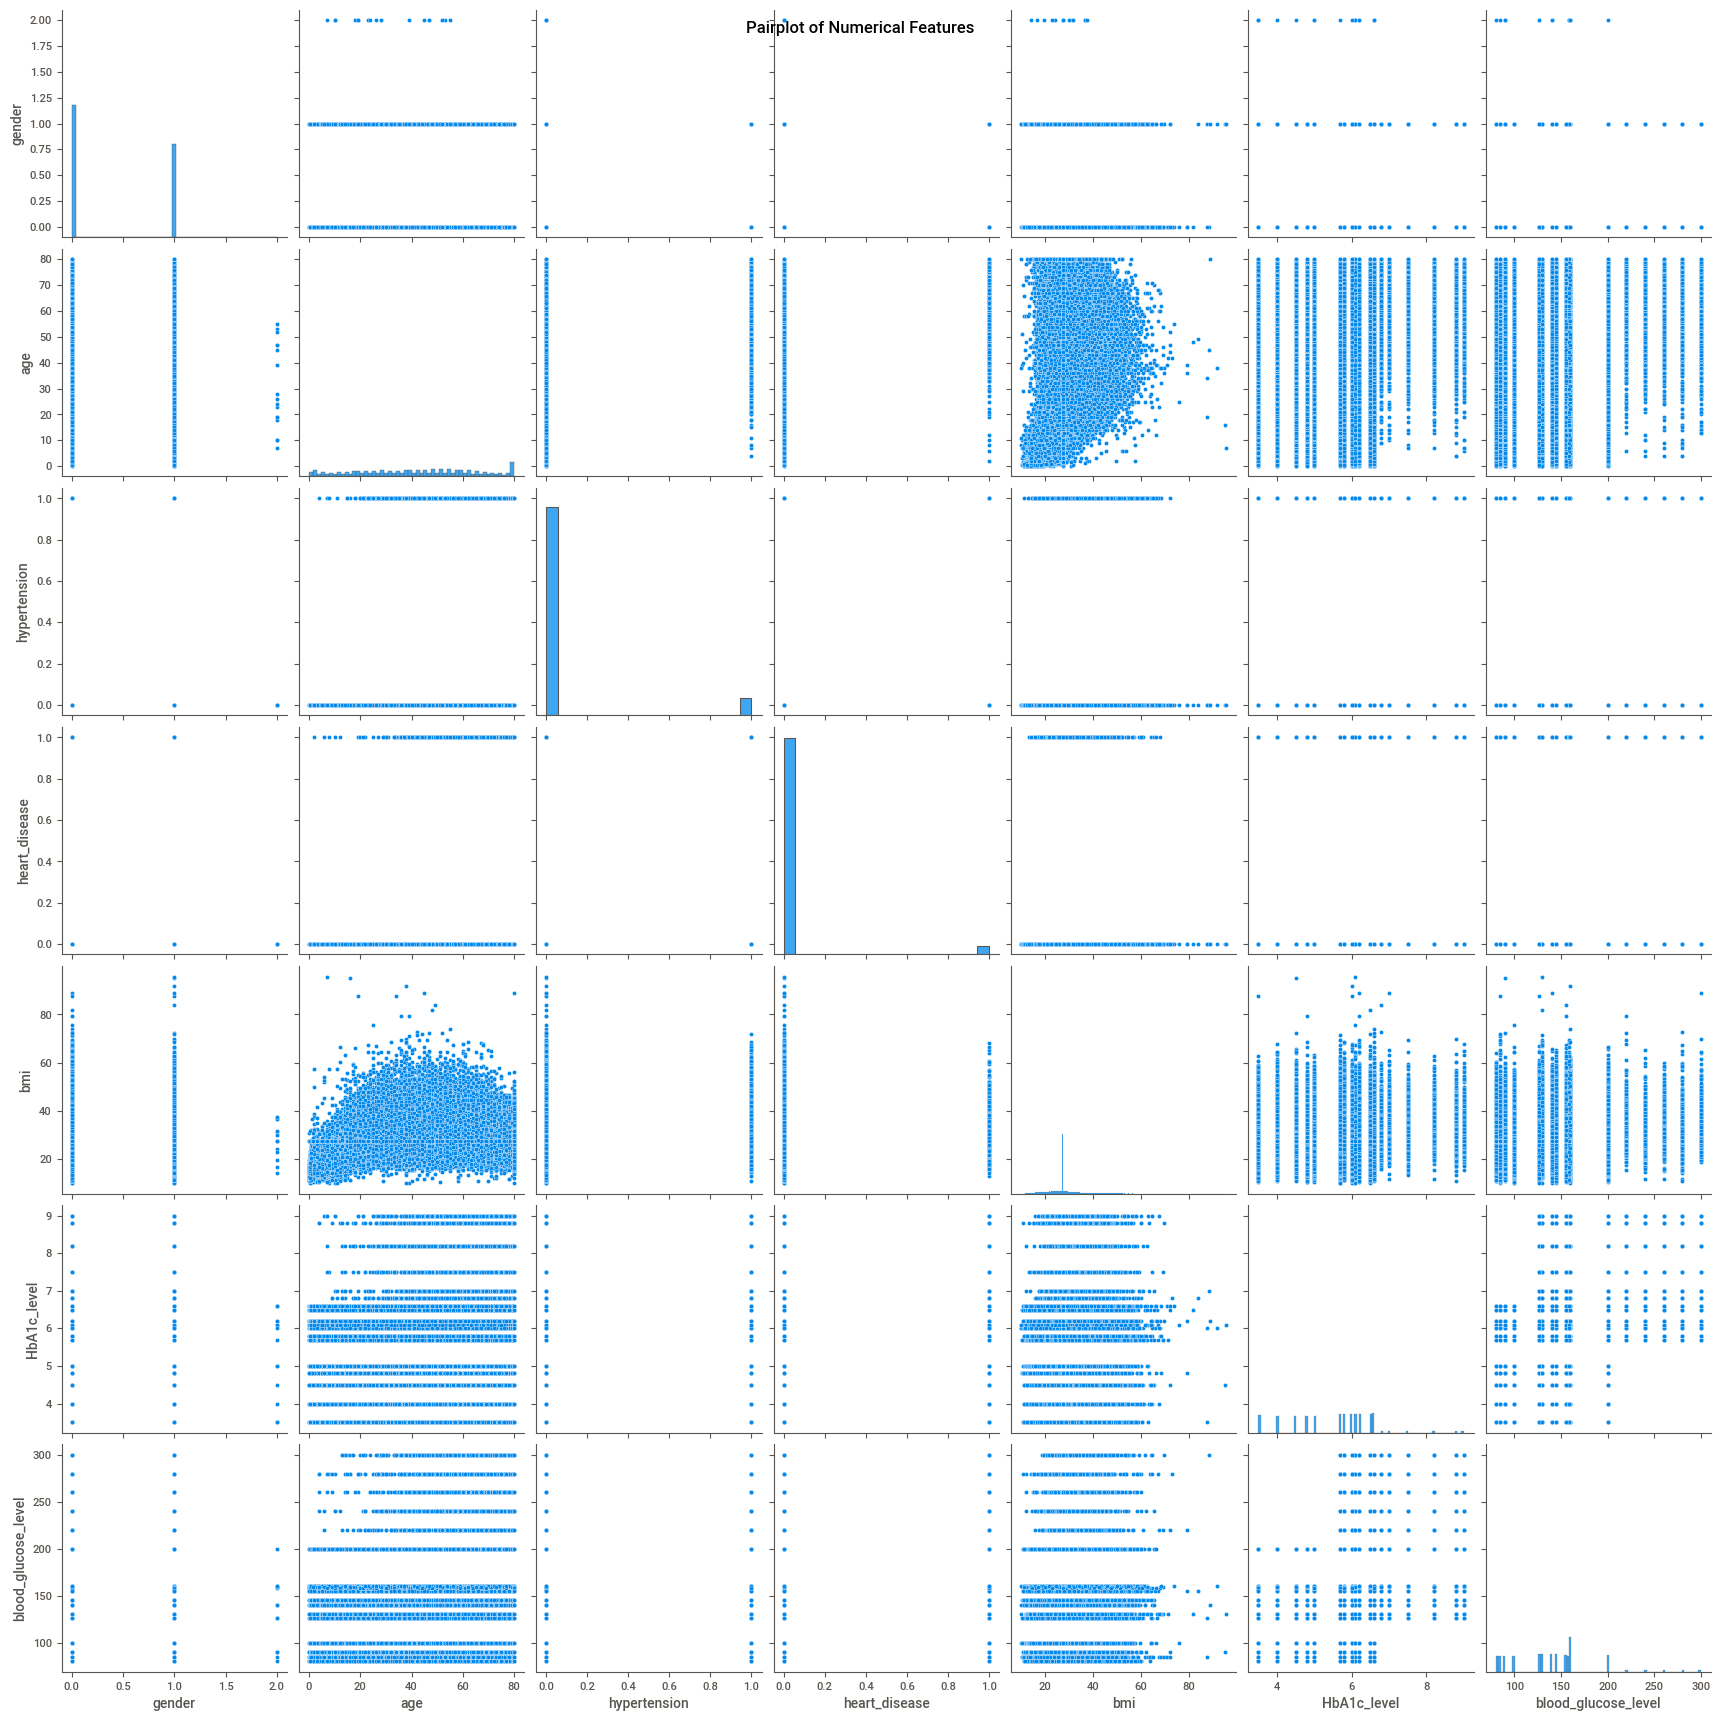

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms of numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot of numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_features)
plt.title('Boxplot of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of numerical features
sns.pairplot(data=numerical_features)
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Countplot of categorical features
categorical_features = X.select_dtypes(include=['object'])
for col in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_features, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()
